# 0. Setup

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
with np.load('notMNIST.npz') as data :
    Data, Target = data ['images'], data['labels']
    posClass = 2
    negClass = 9
    dataIndx = (Target==posClass) + (Target==negClass)
    Data = Data[dataIndx]/255.
    Target = Target[dataIndx].reshape(-1, 1)
    Target[Target==posClass] = 1
    Target[Target==negClass] = 0
    np.random.seed(521)
    randIndx = np.arange(len(Data))
    np.random.shuffle(randIndx)
    Data, Target = Data[randIndx], Target[randIndx]
    trainData, trainTarget = Data[:3500], Target[:3500]
    validData, validTarget = Data[3500:3600], Target[3500:3600]
    testData, testTarget = Data[3600:], Target[3600:]

In [3]:
print('Train Data Shape:', trainData.shape, '\nTrain Target:', trainTarget.shape)
print('Valid Data Shape:', validData.shape, '\nValid Target:', validTarget.shape)
print('Test Data Shape:', testData.shape, '\nTest Target:', testTarget.shape)

Train Data Shape: (3500, 28, 28) 
Train Target: (3500, 1)
Valid Data Shape: (100, 28, 28) 
Valid Target: (100, 1)
Test Data Shape: (145, 28, 28) 
Test Target: (145, 1)


In [4]:
def flatten(data, size):
    data = data.flatten().reshape(size,784)
    #data = np.transpose(data)
    return data

In [5]:
trainData = flatten(trainData,trainData.shape[0])
validData = flatten(validData,validData.shape[0])
testData = flatten(testData,testData.shape[0])

In [6]:
print('Train Data Shape:', trainData.shape, '\nTrain Target:', trainTarget.shape)
print('Valid Data Shape:', validData.shape, '\nValid Target:', validTarget.shape)
print('Test Data Shape:', testData.shape, '\nTest Target:', testTarget.shape)

Train Data Shape: (3500, 784) 
Train Target: (3500, 1)
Valid Data Shape: (100, 784) 
Valid Target: (100, 1)
Test Data Shape: (145, 784) 
Test Target: (145, 1)


In [7]:
def loss_curve(training_err,validation_err,test_err): #Function to plot loss curve
    epochs = training_err.shape[0]
    x_axis = np.linspace(0,epochs,epochs)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.plot(x_axis,training_err)
    plt.plot(x_axis,validation_err)
    plt.plot(x_axis,test_err)
    plt.legend(['Training Error', 'Validation Error', 'Test Error'], loc='center right')
    plt.show()

In [8]:
def acc_curve(train_acc,validation_acc,test_acc): #Function to plot accuracy curve
    epochs = training_err.shape[0]
    x_axis = np.linspace(0,epochs,epochs)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_axis,train_acc)
    plt.plot(x_axis,validation_acc)
    plt.plot(x_axis,test_acc)
    plt.legend(['Training Accuracy', 'Validation Accuracy', 'Test Accuracy'], loc='center right')
    plt.show()

# 1. Linear Regression

### 1.1 Loss Function and Gradient

In [9]:
def MSE(W, b, x, y, reg): # Returns a number indicating total loss
    temp = np.matmul(x,W)+b-y
    first = (1/(2*x.shape[0]))*np.matmul(np.transpose(temp),temp)
    second = (reg/2)*np.matmul(np.transpose(W),W)
    return first+second

In [10]:
def grad_MSE(W, b, x, y, reg): #Returns gradient wrt the weights and biases
    b_full= np.ones((3500,1))*b
    ones = np.ones((3500,1))
    grad_w = (1/(x.shape[0]))*(np.matmul(np.matmul(np.transpose(x),x),W)+np.matmul(np.transpose(x),b_full)-np.matmul(np.transpose(x),y))+reg*W
    grad_b = (1/(x.shape[0]))*(np.matmul(np.transpose(ones),(np.matmul(x,W)-y+b)))
    return grad_w, grad_b
    

### 1.2 Gradient Descent Implementation

In [11]:
def predict(X,W,b):
    yhat = np.matmul(X,W) + b
    yhat[yhat <= 0.5]=0
    yhat[yhat > 0.5]=1
    
    return yhat

In [12]:
def grad_descent(W, b, x, y, alpha, epochs, reg, error_tol):
    training_err = np.zeros(epochs)
    train_acc = np.zeros(epochs)

    validation_err = np.zeros(epochs)
    validation_acc = np.zeros(epochs)

    test_err = np.zeros(epochs)
    test_acc = np.zeros(epochs)
    
    for i in range(0,epochs):
        training_err[i] = MSE(W, b, x, y, reg)
        validation_err[i]= MSE(W, b, validData, validTarget, reg)
        test_err[i]= MSE(W, b, testData, testTarget, reg)
        
        train_acc[i] = accuracy_score(y, predict(x,W,b))
        validation_acc[i] = accuracy_score(validTarget, predict(validData,W,b))
        test_acc[i] = accuracy_score(testTarget, predict(testData,W,b))
        
        grad_w,grad_b = grad_MSE(W, b, x, y, reg)
        W_new = W - alpha*grad_w
        b = b - alpha*grad_b
        if abs(LA.norm(W_new - W))<error_tol:
            break
        else:
            W = W_new
            
        if i % 100 == 0:
            print("Iteration: %d, MSE-training: %.2f, Accuracy: %.2f" %(i,  training_err[i],train_acc[i]))
        if i == epochs-1:
            print("Final Epoch: MSE-training: %.2f, Training Accuracy: %.2f" %( training_err[i],train_acc[i]))
            print("Final Epoch: MSE-validation: %.2f, Validation Accuracy: %.2f" %(validation_err[i],validation_acc[i]))
            print("Final Epoch: MSE-test: %.2f, Test Accuracy: %.2f" %(test_err[i],test_acc[i]))
            
    return W_new,b, training_err, validation_err, test_err, train_acc,validation_acc,test_acc

In [13]:
W = np.zeros((784,1))
b = 1
error_tol = 10**-7
alpha = 0.005
epochs = 100
reg = 0.1
W_opt, b_opt, training_err, validation_err,test_err, train_acc,validation_acc,test_acc = grad_descent(W, b, trainData,trainTarget, alpha, epochs, reg, error_tol)

Iteration: 0, MSE-training: 0.25, Accuracy: 0.50
Final Epoch: MSE-training: 0.03, Training Accuracy: 0.93
Final Epoch: MSE-validation: 0.04, Validation Accuracy: 0.95
Final Epoch: MSE-test: 0.03, Test Accuracy: 0.93


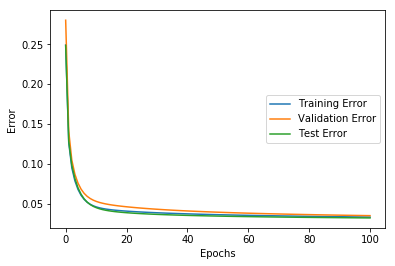

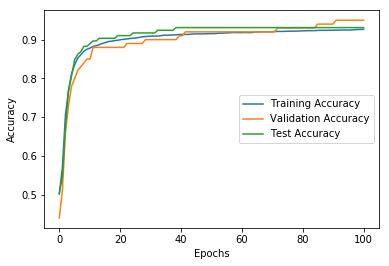

In [14]:
loss_curve(training_err,validation_err,test_err)
acc_curve(train_acc,validation_acc,test_acc)

### 1.3 Tuning the Learning Rate

In [15]:
from timeit import default_timer as timer
error_tol = 10**-7
epochs = 5000
reg = 0

Iteration: 0, MSE-training: 0.25, Accuracy: 0.50
Iteration: 100, MSE-training: 0.03, Accuracy: 0.93
Iteration: 200, MSE-training: 0.03, Accuracy: 0.94
Iteration: 300, MSE-training: 0.03, Accuracy: 0.95
Iteration: 400, MSE-training: 0.03, Accuracy: 0.95
Iteration: 500, MSE-training: 0.03, Accuracy: 0.95
Iteration: 600, MSE-training: 0.02, Accuracy: 0.95
Iteration: 700, MSE-training: 0.02, Accuracy: 0.96
Iteration: 800, MSE-training: 0.02, Accuracy: 0.96
Iteration: 900, MSE-training: 0.02, Accuracy: 0.96
Iteration: 1000, MSE-training: 0.02, Accuracy: 0.96
Iteration: 1100, MSE-training: 0.02, Accuracy: 0.96
Iteration: 1200, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1300, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1400, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1500, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1600, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1700, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1800, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1900, MSE-tra

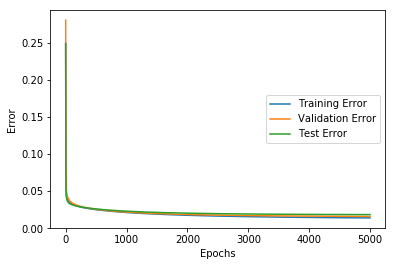

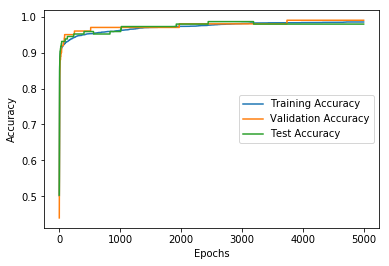

In [16]:
#alpha = 0.005
W = np.zeros((784,1))
b = 1
alpha = 0.005

#Timing
start = timer()
W_opt, b_opt, training_err, validation_err,test_err, train_acc,validation_acc,test_acc = grad_descent(W, b, trainData,trainTarget, alpha, epochs, reg, error_tol)
end = timer()
print(end - start)

loss_curve(training_err,validation_err,test_err)
acc_curve(train_acc,validation_acc,test_acc)

Iteration: 0, MSE-training: 0.25, Accuracy: 0.50
Iteration: 100, MSE-training: 0.04, Accuracy: 0.90
Iteration: 200, MSE-training: 0.04, Accuracy: 0.91
Iteration: 300, MSE-training: 0.04, Accuracy: 0.92
Iteration: 400, MSE-training: 0.03, Accuracy: 0.92
Iteration: 500, MSE-training: 0.03, Accuracy: 0.93
Iteration: 600, MSE-training: 0.03, Accuracy: 0.93
Iteration: 700, MSE-training: 0.03, Accuracy: 0.93
Iteration: 800, MSE-training: 0.03, Accuracy: 0.93
Iteration: 900, MSE-training: 0.03, Accuracy: 0.94
Iteration: 1000, MSE-training: 0.03, Accuracy: 0.94
Iteration: 1100, MSE-training: 0.03, Accuracy: 0.94
Iteration: 1200, MSE-training: 0.03, Accuracy: 0.94
Iteration: 1300, MSE-training: 0.03, Accuracy: 0.94
Iteration: 1400, MSE-training: 0.03, Accuracy: 0.94
Iteration: 1500, MSE-training: 0.03, Accuracy: 0.95
Iteration: 1600, MSE-training: 0.03, Accuracy: 0.95
Iteration: 1700, MSE-training: 0.03, Accuracy: 0.95
Iteration: 1800, MSE-training: 0.03, Accuracy: 0.95
Iteration: 1900, MSE-tra

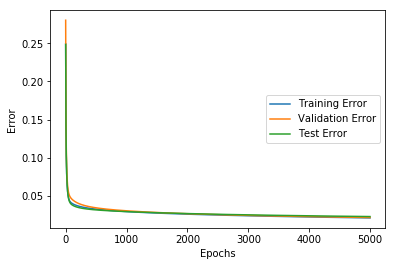

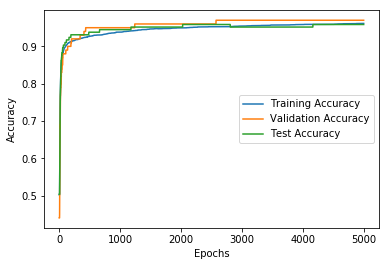

In [17]:
#alpha = 0.001
W = np.zeros((784,1))
b = 1
alpha = 0.001

#Timing
start = timer()
W_opt, b_opt, training_err, validation_err,test_err, train_acc,validation_acc,test_acc = grad_descent(W, b, trainData,trainTarget, alpha, epochs, reg, error_tol)
end = timer()
print(end - start)

loss_curve(training_err,validation_err,test_err)
acc_curve(train_acc,validation_acc,test_acc)

Iteration: 0, MSE-training: 0.25, Accuracy: 0.50
Iteration: 100, MSE-training: 0.10, Accuracy: 0.65
Iteration: 200, MSE-training: 0.07, Accuracy: 0.80
Iteration: 300, MSE-training: 0.06, Accuracy: 0.84
Iteration: 400, MSE-training: 0.05, Accuracy: 0.87
Iteration: 500, MSE-training: 0.05, Accuracy: 0.88
Iteration: 600, MSE-training: 0.04, Accuracy: 0.88
Iteration: 700, MSE-training: 0.04, Accuracy: 0.89
Iteration: 800, MSE-training: 0.04, Accuracy: 0.89
Iteration: 900, MSE-training: 0.04, Accuracy: 0.90
Iteration: 1000, MSE-training: 0.04, Accuracy: 0.90
Iteration: 1100, MSE-training: 0.04, Accuracy: 0.90
Iteration: 1200, MSE-training: 0.04, Accuracy: 0.90
Iteration: 1300, MSE-training: 0.04, Accuracy: 0.91
Iteration: 1400, MSE-training: 0.04, Accuracy: 0.91
Iteration: 1500, MSE-training: 0.04, Accuracy: 0.91
Iteration: 1600, MSE-training: 0.04, Accuracy: 0.91
Iteration: 1700, MSE-training: 0.04, Accuracy: 0.91
Iteration: 1800, MSE-training: 0.04, Accuracy: 0.91
Iteration: 1900, MSE-tra

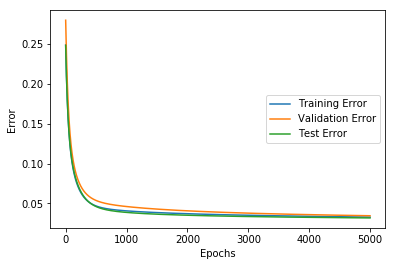

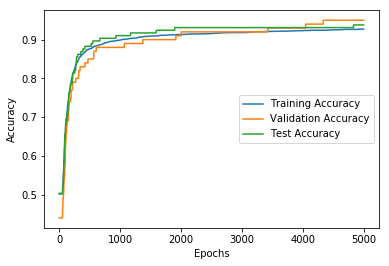

In [18]:
#alpha = 0.0001
W = np.zeros((784,1))
b = 1
alpha = 0.0001

#Timing
start = timer()
W_opt, b_opt, training_err, validation_err,test_err, train_acc,validation_acc,test_acc = grad_descent(W, b, trainData,trainTarget, alpha, epochs, reg, error_tol)
end = timer()
print(end - start)

loss_curve(training_err,validation_err,test_err)
acc_curve(train_acc,validation_acc,test_acc)

### 1.4 Generalization

In [19]:
error_tol = 10**-7
epochs = 5000
alpha = 0.005

Iteration: 0, MSE-training: 0.25, Accuracy: 0.50
Iteration: 100, MSE-training: 0.03, Accuracy: 0.93
Iteration: 200, MSE-training: 0.03, Accuracy: 0.94
Iteration: 300, MSE-training: 0.03, Accuracy: 0.95
Iteration: 400, MSE-training: 0.03, Accuracy: 0.95
Iteration: 500, MSE-training: 0.03, Accuracy: 0.95
Iteration: 600, MSE-training: 0.02, Accuracy: 0.95
Iteration: 700, MSE-training: 0.02, Accuracy: 0.96
Iteration: 800, MSE-training: 0.02, Accuracy: 0.96
Iteration: 900, MSE-training: 0.02, Accuracy: 0.96
Iteration: 1000, MSE-training: 0.02, Accuracy: 0.96
Iteration: 1100, MSE-training: 0.02, Accuracy: 0.96
Iteration: 1200, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1300, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1400, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1500, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1600, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1700, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1800, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1900, MSE-tra

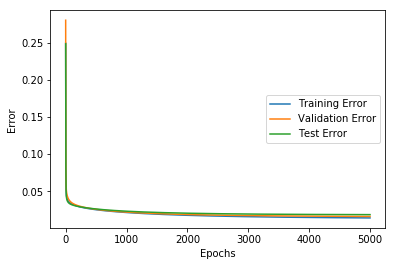

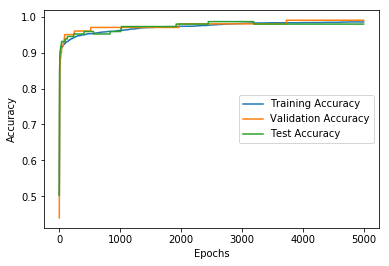

In [20]:
#reg = 0.001
W = np.zeros((784,1))
b = 1
reg = 0.001

W_opt, b_opt, training_err, validation_err,test_err, train_acc,validation_acc,test_acc = grad_descent(W, b, trainData,trainTarget, alpha, epochs, reg, error_tol)

loss_curve(training_err,validation_err,test_err)
acc_curve(train_acc,validation_acc,test_acc)

Iteration: 0, MSE-training: 0.25, Accuracy: 0.50
Iteration: 100, MSE-training: 0.03, Accuracy: 0.93
Iteration: 200, MSE-training: 0.03, Accuracy: 0.94
Iteration: 300, MSE-training: 0.03, Accuracy: 0.95
Iteration: 400, MSE-training: 0.03, Accuracy: 0.95
Iteration: 500, MSE-training: 0.03, Accuracy: 0.95
Iteration: 600, MSE-training: 0.03, Accuracy: 0.95
Iteration: 700, MSE-training: 0.02, Accuracy: 0.96
Iteration: 800, MSE-training: 0.02, Accuracy: 0.96
Iteration: 900, MSE-training: 0.02, Accuracy: 0.96
Iteration: 1000, MSE-training: 0.02, Accuracy: 0.96
Iteration: 1100, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1200, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1300, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1400, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1500, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1600, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1700, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1800, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1900, MSE-tra

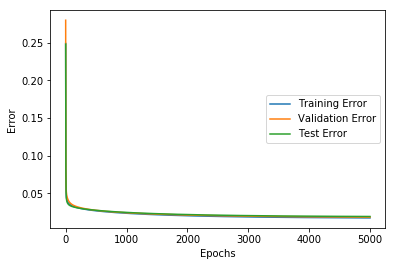

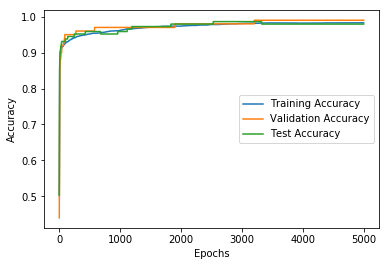

In [21]:
#reg = 0.1
W = np.zeros((784,1))
b = 1
reg = 0.1

W_opt, b_opt, training_err, validation_err,test_err, train_acc,validation_acc,test_acc = grad_descent(W, b, trainData,trainTarget, alpha, epochs, reg, error_tol)

loss_curve(training_err,validation_err,test_err)
acc_curve(train_acc,validation_acc,test_acc)

Iteration: 0, MSE-training: 0.25, Accuracy: 0.50
Iteration: 100, MSE-training: 0.04, Accuracy: 0.92
Iteration: 200, MSE-training: 0.03, Accuracy: 0.93
Iteration: 300, MSE-training: 0.03, Accuracy: 0.94
Iteration: 400, MSE-training: 0.03, Accuracy: 0.94
Iteration: 500, MSE-training: 0.03, Accuracy: 0.95
Iteration: 600, MSE-training: 0.03, Accuracy: 0.95
Iteration: 700, MSE-training: 0.03, Accuracy: 0.95
Iteration: 800, MSE-training: 0.03, Accuracy: 0.96
Iteration: 900, MSE-training: 0.03, Accuracy: 0.96
Iteration: 1000, MSE-training: 0.03, Accuracy: 0.96
Iteration: 1100, MSE-training: 0.03, Accuracy: 0.96
Iteration: 1200, MSE-training: 0.03, Accuracy: 0.96
Iteration: 1300, MSE-training: 0.03, Accuracy: 0.97
Iteration: 1400, MSE-training: 0.03, Accuracy: 0.97
Iteration: 1500, MSE-training: 0.03, Accuracy: 0.97
Iteration: 1600, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1700, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1800, MSE-training: 0.02, Accuracy: 0.97
Iteration: 1900, MSE-tra

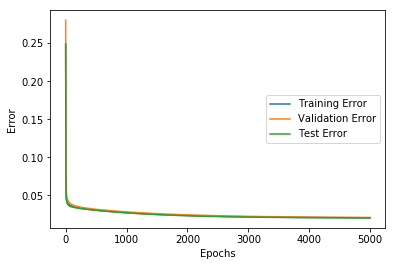

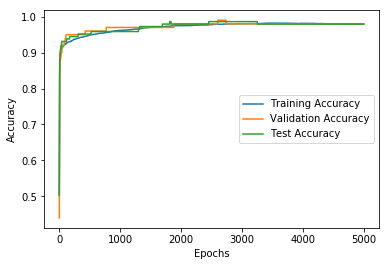

In [22]:
#reg = 0.5
W = np.zeros((784,1))
b = 1
reg = 0.5

W_opt, b_opt, training_err, validation_err,test_err, train_acc,validation_acc,test_acc = grad_descent(W, b, trainData,trainTarget, alpha, epochs, reg, error_tol)

loss_curve(training_err,validation_err,test_err)
acc_curve(train_acc,validation_acc,test_acc)

### 1.5 Comparing Batch GD with normal equation

In [23]:
def normal_equation(train_data, train_target):
    N = np.shape(train_data)[0] 
    X = np.append(np.ones([N, 1]), train_data, 1)
    xx_inv = np.linalg.inv(np.matmul(np.transpose(X), X))
    W_opt = np.matmul(np.matmul(xx_inv, np.transpose(X)), train_target)
    return W_opt

In [24]:
def grad_descent_comp(W, b, x, y, alpha, epochs, reg, error_tol):
    training_err = np.zeros(epochs)
    train_acc = np.zeros(epochs)

    for i in range(0,epochs):
        training_err[i] = MSE(W, b, x, y, reg)
        train_acc[i] = accuracy_score(y, predict(x,W,b))
        
        grad_w,grad_b = grad_MSE(W, b, x, y, reg)
        W_new = W - alpha*grad_w
        b = b - alpha*grad_b
        if abs(LA.norm(W_new - W))<error_tol:
            break
        else:
            W = W_new
            
        if i == epochs-1:
            print("Final Epoch: MSE-training: %.2f, Training Accuracy: %.2f" %( training_err[i],train_acc[i]))

In [25]:
#Running Normal Equation
start = timer()
W_opt = normal_equation(trainData, trainTarget)
end = timer()
print(end - start)

W = W_opt[1:]
b = W_opt[0]
reg = 0
normal_err = MSE(W, b, trainData, trainTarget, reg)
normal_acc = accuracy_score(trainTarget, predict(trainData,W,b))
print("Final MSE-training: %.2f , Training Accuracy: %.2f" %(normal_err,normal_acc))

0.46146909999970376
Final MSE-training: 0.01 , Training Accuracy: 0.99


In [26]:
#Running Batch Gradient Descent 
W = np.zeros((784,1))
b = 1
epochs = 5000
reg = 0
alpha = 0.005
error_tol = 10**-7

start = timer()
grad_descent_comp(W, b, trainData,trainTarget, alpha, epochs, reg, error_tol)
end = timer()
print(end - start)

Final Epoch: MSE-training: 0.01, Training Accuracy: 0.99
407.2845623000003


# 2. Logistic Regression 

In [27]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [28]:
def prediction(yhat):
    for i in range(len(yhat)):
        if yhat[i] <= 0.5:
            yhat[i] = 0
        elif yhat[i]> 0.5:
            yhat[i] =1 
    return yhat

### 2.1.1 Loss Function and Gradient 

In [29]:
def crossEntropyLoss(W, b, x, y, reg): # Returns a number indicating total loss
    z = np.matmul(x,W)+b
    yHat =  sigmoid(z)
    m = x.shape[0]
    loss =(-1/m)*np.sum((y*np.log(yHat))+((1-y)*np.log(1-yHat)))+ (reg/2)*np.matmul(np.transpose(W),W)
    return loss

In [30]:
def gradCE(W, b, x, y, reg):
    z = np.matmul(x,W)+b
    yHat =  sigmoid(z)
    m = x.shape[0]
    gradient_w = (1/m)*np.matmul(x.T,(yHat-y)) + reg*W
    gradient_b = (1/m)*np.sum(yHat - y)
    return gradient_w, gradient_b 

### 2.1.2 Learning ( Lambda = 0.1 and 5000 Epochs)

In [31]:
def grad_descent(w, b, x, y, alpha, epochs, reg, EPS, lossType=None):
    training_err = np.zeros(epochs)
    train_acc = np.zeros(epochs)

    validation_err = np.zeros(epochs)
    validation_acc = np.zeros(epochs)

    test_err = np.zeros(epochs)
    test_acc = np.zeros(epochs)
    
    if lossType == 'MSE':
        for i in range(0,epochs):
            training_err[i] = MSE(w, b, x, y, reg)
            validation_err[i]= MSE(w, b, validData, validTarget, reg)
            test_err[i]= MSE(w, b, testData, testTarget, reg)

            train_acc[i] = accuracy_score(y, predict(x,w,b))
            validation_acc[i] = accuracy_score(validTarget, predict(validData,w,b))
            test_acc[i] = accuracy_score(testTarget, predict(testData,w,b))

            grad_w,grad_b = grad_MSE(w, b, x, y, reg)
            W_new = w - alpha*grad_w
            b = b - alpha*grad_b
            
            if abs(LA.norm(W_new - w))<error_tol:
                break
            else:
                w = W_new

            if i == epochs-1:
                print("Final Epoch: MSE-training: %.2f, Training Accuracy: %.2f" %( training_err[i],train_acc[i]))
                print("Final Epoch: MSE-validation: %.2f, Validation Accuracy: %.2f" %(validation_err[i],validation_acc[i]))
                print("Final Epoch: MSE-test: %.2f, Test Accuracy: %.2f" %(test_err[i],test_acc[i]))

        return W_new,b, training_err, validation_err, test_err, train_acc,validation_acc,test_acc
    
    elif lossType == "CE": 
        for i in range(epochs):

            #Findting the error's
            training_err[i]= crossEntropyLoss(w, b, trainData, trainTarget, reg)
            validation_err[i]= crossEntropyLoss(w, b, validData, validTarget, reg)
            test_err[i] = crossEntropyLoss(w, b, testData, testTarget, reg)

            # Finding the gradients 
            dw, db = gradCE(w,b,x,y,reg)

            # Updating the gradients
            W_new =  w - alpha*dw
            b =  b - alpha*db
            
            if abs(LA.norm(W_new - w))<EPS:
                break
            else:
                w = W_new

            # Train Data Accuracy 
            yhat = sigmoid(np.matmul(trainData,w)+b)
            y_pred = prediction(yhat)
            train_acc[i]=(accuracy_score(trainTarget, y_pred))

            # Test Data Accuracy
            yhat_t = sigmoid(np.matmul(testData,w)+b)
            y_pred_t = prediction(yhat_t)
            test_acc[i]=(accuracy_score(testTarget, y_pred_t))

            # Valid Data Accuracy
            yhat_v = sigmoid(np.matmul(validData,w)+b)
            y_pred_v = prediction(yhat_v)
            validation_acc[i]=(accuracy_score(validTarget, y_pred_v))
            
            if i == epochs-1:
                print("Final Epoch: CE-training: %.2f, Training Accuracy: %.2f" %( training_err[i],train_acc[i]))
                print("Final Epoch: CE-validation: %.2f, Validation Accuracy: %.2f" %(validation_err[i],validation_acc[i]))
                print("Final Epoch: CE-test: %.2f, Test Accuracy: %.2f" %(test_err[i],test_acc[i]))

        return w, b, training_err, validation_err, test_err, train_acc,validation_acc,test_acc

In [32]:
Weight = np.zeros(shape = (784,1))
bias   = 1
alpha = 0.005
epochs = 5000
reg = 0.1
EPS = 10**-7
W2_opt, b2_opt, training_err, validation_err, test_err, train_acc,validation_acc,test_acc = grad_descent(Weight, bias, trainData,trainTarget, alpha, epochs, reg, EPS,'CE')

Final Epoch: CE-training: 0.12, Training Accuracy: 0.98
Final Epoch: CE-validation: 0.11, Validation Accuracy: 0.98
Final Epoch: CE-test: 0.12, Test Accuracy: 0.99


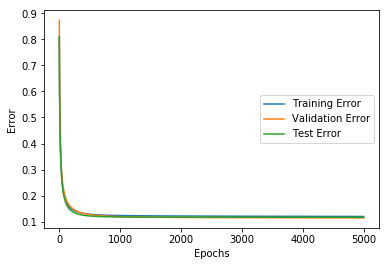

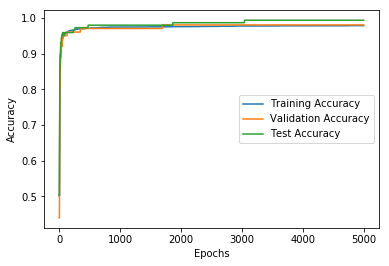

In [33]:
loss_curve(training_err, validation_err, test_err)
acc_curve(train_acc,validation_acc,test_acc)

### 2.1.3 Comparison to Linear Regression (Learning rate 0.005 & 5000 Epochs)

Final Epoch: CE-training: 0.06, Training Accuracy: 0.98
Final Epoch: CE-validation: 0.04, Validation Accuracy: 0.98
Final Epoch: CE-test: 0.06, Test Accuracy: 0.98


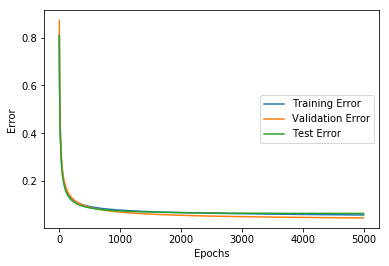

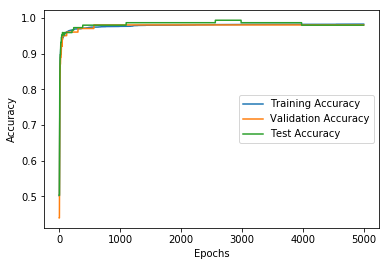

In [34]:
alpha = 0.005
epochs = 5000
reg = 0
EPS = 10**-7
W2_opt, b2_opt, training_err, validation_err, test_err, train_acc,validation_acc,test_acc = grad_descent(Weight, bias, trainData,trainTarget, alpha, epochs, reg, EPS,'CE')
loss_curve(training_err, validation_err, test_err)
acc_curve(train_acc,validation_acc,test_acc)

# 3. Batch Gradient Descent vs. SGD and Adam


## 3.1 SGD

In [35]:
import tensorflow as tf
from sklearn.metrics import accuracy_score

In [36]:
def buildGraph(loss=None):
    #Initialize weight and bias tensors
    tf.set_random_seed(421)
    W = tf.Variable(tf.truncated_normal(shape=[784,1], stddev=0.5), name='weights')
    b = tf.Variable(1.0, name='biases')
    
    X = tf.placeholder(tf.float32)
    y_target = tf.placeholder(tf.float32, name='y_target')
    reg_param = tf.placeholder(tf.float32)
    
    if loss == 'MSE':
        y_predicted = tf.matmul(X,W) + b
        loss_error = tf.reduce_mean(tf.square(y_predicted - y_target),name='loss') + reg_param*tf.nn.l2_loss(W)
    
    elif loss == 'CE': 
        y_predicted = tf.sigmoid(tf.add(tf.matmul(X,W),b))
        loss_error = tf.reduce_mean(tf.reduce_sum(-y_target * tf.log(y_predicted)- (1 - y_target) * tf.log(1.000001 - y_predicted), axis=1))+ reg_param*tf.nn.l2_loss(W)
        
    # Optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
    train = optimizer.minimize(loss=loss_error)
    
    return W, b, X, y_predicted, y_target, loss_error, optimizer, train, reg_param

In [37]:
def predictions(yhat):
    yhat[yhat <= 0.5]=0
    yhat[yhat > 0.5]=1
    
    return yhat

### 3.2 Implementing Stochastic Gradient Descent  

In [38]:
init = tf.global_variables_initializer() 
W, b, X, y_predicted, y_target, loss_error, optimizer, train, reg_param = buildGraph("MSE")
epochs = 700
batch_size = 500
reg = 0
num_batch = 3500/batch_size

training_err = np.zeros(epochs)
train_acc = np.zeros(epochs)

validation_err = np.zeros(epochs)
validation_acc = np.zeros(epochs)

test_err = np.zeros(epochs)
test_acc = np.zeros(epochs)

with tf.Session() as sess:
    init = tf.global_variables_initializer() 
    sess.run(init)
    
    for epoch in range(0,epochs): 
        rand_index = np.random.choice(3500,3500,replace=False)
        trainDataShuffled =  trainData[rand_index]
        trainTargetShuffled = trainTarget[rand_index]
        
        for i in range(0,trainData.shape[0], batch_size):
            X_train_mini = trainDataShuffled[i:i+batch_size]  
            y_train_mini = trainTargetShuffled[i:i+batch_size]  
            sess.run(train, feed_dict={X: X_train_mini, y_target: y_train_mini, reg_param: reg}) 
        
        #Training Metrics
        train_err, yhat = sess.run([loss_error, y_predicted], feed_dict={X: trainDataShuffled, y_target: trainTargetShuffled, reg_param: reg}) 
        training_err[epoch] = train_err
        train_acc[epoch] = accuracy_score(trainTargetShuffled, predictions(yhat))
        
        #Validation Metrics
        val_err, yhat_v = sess.run([loss_error, y_predicted], feed_dict={X: validData, y_target: validTarget,reg_param: reg}) 
        validation_err[epoch] = val_err
        validation_acc[epoch] = accuracy_score(validTarget, predictions(yhat_v))
        
        #Test Metrics
        tst_err, yhat_t = sess.run([loss_error, y_predicted], feed_dict={X: testData, y_target: testTarget,reg_param: reg}) 
        test_err[epoch] = tst_err
        test_acc[epoch] = accuracy_score(testTarget, predictions(yhat_t))
        
        if epoch % 100 == 0:
            print("Iteration: %d, MSE-training: %.2f, Accuracy: %.2f" %(epoch, train_err,train_acc[epoch]))
        if epoch == epochs-1:
            print("Final Epoch: MSE-training: %.2f, Training Accuracy: %.2f" %(train_err,train_acc[epoch]))
            print("Final Epoch: MSE-validation: %.2f, Validation Accuracy: %.2f" %(val_err,validation_acc[epoch]))
            print("Final Epoch: MSE-test: %.2f, Test Accuracy: %.2f" %(tst_err,test_acc[epoch]))
    

Iteration: 0, MSE-training: 40.85, Accuracy: 0.50
Iteration: 100, MSE-training: 3.38, Accuracy: 0.60
Iteration: 200, MSE-training: 1.63, Accuracy: 0.65
Iteration: 300, MSE-training: 0.95, Accuracy: 0.69
Iteration: 400, MSE-training: 0.61, Accuracy: 0.74
Iteration: 500, MSE-training: 0.41, Accuracy: 0.79
Iteration: 600, MSE-training: 0.28, Accuracy: 0.82
Final Epoch: MSE-training: 0.20, Training Accuracy: 0.86
Final Epoch: MSE-validation: 0.26, Validation Accuracy: 0.83
Final Epoch: MSE-test: 0.26, Test Accuracy: 0.85


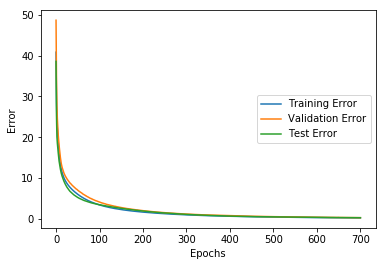

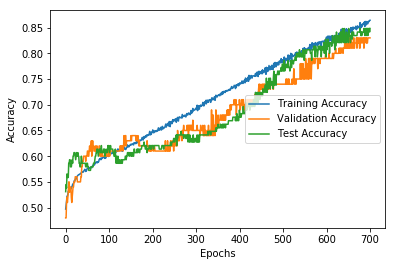

In [39]:
loss_curve(training_err,validation_err,test_err)
acc_curve(train_acc,validation_acc,test_acc)

### 3.3 Batch Size Investigation 

In [40]:
def SDG(batch_size):
    init = tf.global_variables_initializer() 
    W, b, X, y_predicted, y_target, loss_error, optimizer, train, reg_param = buildGraph("MSE")
    epochs = 700
    reg = 0
    num_batch = 3500/batch_size

    training_err = np.zeros(epochs)
    train_acc = np.zeros(epochs)

    validation_err = np.zeros(epochs)
    validation_acc = np.zeros(epochs)

    test_err = np.zeros(epochs)
    test_acc = np.zeros(epochs)

    with tf.Session() as sess:
        init = tf.global_variables_initializer() 
        sess.run(init)

        for epoch in range(0,epochs): 
            rand_index = np.random.choice(3500,3500,replace=False)
            trainDataShuffled =  trainData[rand_index]
            trainTargetShuffled = trainTarget[rand_index]

            for i in range(0,trainData.shape[0], batch_size):
                X_train_mini = trainDataShuffled[i:i+batch_size]  
                y_train_mini = trainTargetShuffled[i:i+batch_size]  
                sess.run(train, feed_dict={X: X_train_mini, y_target: y_train_mini, reg_param: reg}) 

            #Training Metrics
            train_err, yhat = sess.run([loss_error, y_predicted], feed_dict={X: trainDataShuffled, y_target: trainTargetShuffled, reg_param: reg}) 
            training_err[epoch] = train_err
            train_acc[epoch] = accuracy_score(trainTargetShuffled, predictions(yhat))

            #Validation Metrics
            val_err, yhat_v = sess.run([loss_error, y_predicted], feed_dict={X: validData, y_target: validTarget,reg_param: reg}) 
            validation_err[epoch] = val_err
            validation_acc[epoch] = accuracy_score(validTarget, predictions(yhat_v))

            #Test Metrics
            tst_err, yhat_t = sess.run([loss_error, y_predicted], feed_dict={X: testData, y_target: testTarget,reg_param: reg}) 
            test_err[epoch] = tst_err
            test_acc[epoch] = accuracy_score(testTarget, predictions(yhat_t))

            if epoch % 100 == 0:
                print("Iteration: %d, MSE-training: %.2f, Accuracy: %.2f" %(epoch, train_err,train_acc[epoch]))
            if epoch == epochs-1:
                print("Final Epoch: MSE-training: %.2f, Training Accuracy: %.2f" %(train_err,train_acc[epoch]))
                print("Final Epoch: MSE-validation: %.2f, Validation Accuracy: %.2f" %(val_err,validation_acc[epoch]))
                print("Final Epoch: MSE-test: %.2f, Test Accuracy: %.2f" %(tst_err,test_acc[epoch]))
                
    return training_err,validation_err,test_err,train_acc,validation_acc,test_acc


Iteration: 0, MSE-training: 11.75, Accuracy: 0.40
Iteration: 100, MSE-training: 0.32, Accuracy: 0.80
Iteration: 200, MSE-training: 0.10, Accuracy: 0.92
Iteration: 300, MSE-training: 0.06, Accuracy: 0.96
Iteration: 400, MSE-training: 0.04, Accuracy: 0.98
Iteration: 500, MSE-training: 0.03, Accuracy: 0.98
Iteration: 600, MSE-training: 0.03, Accuracy: 0.99
Final Epoch: MSE-training: 0.03, Training Accuracy: 0.99
Final Epoch: MSE-validation: 0.06, Validation Accuracy: 0.94
Final Epoch: MSE-test: 0.06, Test Accuracy: 0.95


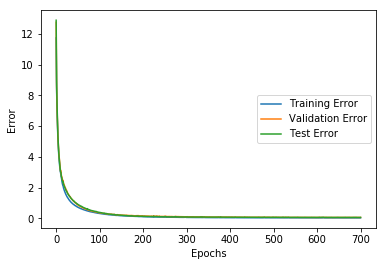

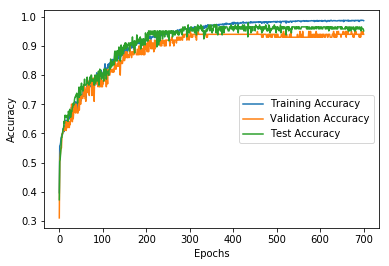

In [41]:
#Batch size 100
batch_size = 100
training_err,validation_err,test_err,train_acc,validation_acc,test_acc = SDG(batch_size)
loss_curve(training_err,validation_err,test_err)
acc_curve(train_acc,validation_acc,test_acc)

Iteration: 0, MSE-training: 45.90, Accuracy: 0.48
Iteration: 100, MSE-training: 3.89, Accuracy: 0.60
Iteration: 200, MSE-training: 1.99, Accuracy: 0.64
Iteration: 300, MSE-training: 1.25, Accuracy: 0.67
Iteration: 400, MSE-training: 0.86, Accuracy: 0.70
Iteration: 500, MSE-training: 0.63, Accuracy: 0.74
Iteration: 600, MSE-training: 0.47, Accuracy: 0.76
Final Epoch: MSE-training: 0.37, Training Accuracy: 0.79
Final Epoch: MSE-validation: 0.47, Validation Accuracy: 0.79
Final Epoch: MSE-test: 0.30, Test Accuracy: 0.86


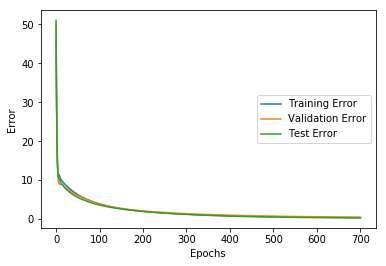

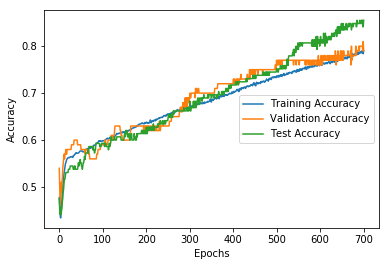

In [42]:
#Batch size 700
batch_size = 700
training_err,validation_err,test_err,train_acc,validation_acc,test_acc = SDG(batch_size)
loss_curve(training_err,validation_err,test_err)
acc_curve(train_acc,validation_acc,test_acc)

Iteration: 0, MSE-training: 14.50, Accuracy: 0.57
Iteration: 100, MSE-training: 3.24, Accuracy: 0.61
Iteration: 200, MSE-training: 1.72, Accuracy: 0.65
Iteration: 300, MSE-training: 1.13, Accuracy: 0.68
Iteration: 400, MSE-training: 0.83, Accuracy: 0.71
Iteration: 500, MSE-training: 0.64, Accuracy: 0.74
Iteration: 600, MSE-training: 0.51, Accuracy: 0.76
Final Epoch: MSE-training: 0.42, Training Accuracy: 0.78
Final Epoch: MSE-validation: 0.51, Validation Accuracy: 0.78
Final Epoch: MSE-test: 0.57, Test Accuracy: 0.75


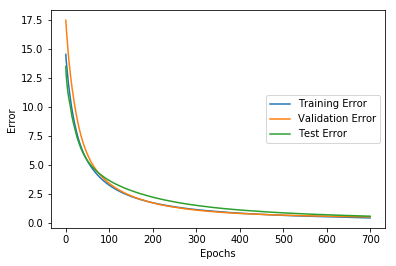

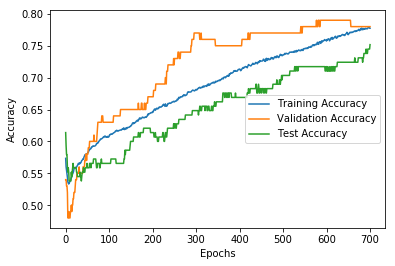

In [43]:
#Batch size 1750
batch_size = 1750
training_err,validation_err,test_err,train_acc,validation_acc,test_acc = SDG(batch_size)
loss_curve(training_err,validation_err,test_err)
acc_curve(train_acc,validation_acc,test_acc)

### 3.4 Hyperparameter Investigation

In [44]:
def hyperparameter_graph(loss=None,b1=None,b2=None,eps=None):
    #Initialize weight and bias tensors
    tf.set_random_seed(421)
    
    W = tf.Variable(tf.truncated_normal(shape=[784,1], stddev=0.5), name='weights')
    b = tf.Variable(1.0, name='biases')
    
    X = tf.placeholder(tf.float32)
    y_target = tf.placeholder(tf.float32, name='y_target')
    reg_param = tf.placeholder(tf.float32)

    if loss == 'MSE':
        y_predicted = tf.matmul(X,W) + b
    elif loss == 'CE':
        z = tf.matmul(X,W) + b
        y_predicted = tf.sigmoid(z)
        
    sig = tf.sigmoid(y_predicted)
    log1 = tf.log(sig)
    log2 = tf.log(1-sig)
    
    if loss == "MSE":
        loss_error = tf.reduce_mean(tf.square(y_predicted - y_target),name='loss') + reg_param*tf.nn.l2_loss(W)
    elif loss == "CE":
        loss_error = tf.reduce_mean(-y_target*log1-(1-y_target)*log2) + reg_param*tf.nn.l2_loss(W)
        
    # Optimizer
    if b1 != None:
        optimizer = tf.train.AdamOptimizer(learning_rate = 0.001,beta1=b1)
    
    if b2 != None:
        optimizer = tf.train.AdamOptimizer(learning_rate = 0.001,beta2=b2)
        
    if eps != None:
        optimizer = tf.train.AdamOptimizer(learning_rate = 0.001,epsilon=eps)
    
    train = optimizer.minimize(loss=loss_error)
    
    return W, b, X, y_predicted, y_target, loss_error, optimizer, train, reg_param

In [45]:
def SDG_hyper(b1,b2,eps):
    init = tf.global_variables_initializer() 
    W, b, X, y_predicted, y_target, loss_error, optimizer, train, reg_param = hyperparameter_graph("MSE",b1,b2,eps)
    batch_size = 500
    epochs = 700
    reg = 0
    num_batch = 3500/batch_size

    training_err = np.zeros(epochs)
    train_acc = np.zeros(epochs)

    validation_err = np.zeros(epochs)
    validation_acc = np.zeros(epochs)

    test_err = np.zeros(epochs)
    test_acc = np.zeros(epochs)

    with tf.Session() as sess:
        init = tf.global_variables_initializer() 
        sess.run(init)

        for epoch in range(0,epochs): 
            rand_index = np.random.choice(3500,3500,replace=False)
            trainDataShuffled =  trainData[rand_index]
            trainTargetShuffled = trainTarget[rand_index]

            for i in range(0,trainData.shape[0], batch_size):
                X_train_mini = trainDataShuffled[i:i+batch_size]  
                y_train_mini = trainTargetShuffled[i:i+batch_size]  
                sess.run(train, feed_dict={X: X_train_mini, y_target: y_train_mini, reg_param: reg}) 

            #Training Metrics
            train_err, yhat = sess.run([loss_error, y_predicted], feed_dict={X: trainDataShuffled, y_target: trainTargetShuffled, reg_param: reg}) 
            training_err[epoch] = train_err
            train_acc[epoch] = accuracy_score(trainTargetShuffled, predictions(yhat))

            #Validation Metrics
            val_err, yhat_v = sess.run([loss_error, y_predicted], feed_dict={X: validData, y_target: validTarget,reg_param: reg}) 
            validation_err[epoch] = val_err
            validation_acc[epoch] = accuracy_score(validTarget, predictions(yhat_v))

            #Test Metrics
            tst_err, yhat_t = sess.run([loss_error, y_predicted], feed_dict={X: testData, y_target: testTarget,reg_param: reg}) 
            test_err[epoch] = tst_err
            test_acc[epoch] = accuracy_score(testTarget, predictions(yhat_t))

            if epoch == epochs-1:
                print("Final Epoch: MSE-training: %.2f, Training Accuracy: %.2f" %(train_err,train_acc[epoch]))
                print("Final Epoch: MSE-validation: %.2f, Validation Accuracy: %.2f" %(val_err,validation_acc[epoch]))
                print("Final Epoch: MSE-test: %.2f, Test Accuracy: %.2f" %(tst_err,test_acc[epoch]))
                
    return training_err,validation_err,test_err,train_acc,validation_acc,test_acc

In [46]:
#Beta1 = 0.95
b1=0.95
b2=None
eps=None
training_err,validation_err,test_err,train_acc,validation_acc,test_acc = SDG_hyper(b1,b2,eps)

Final Epoch: MSE-training: 0.10, Training Accuracy: 0.93
Final Epoch: MSE-validation: 0.10, Validation Accuracy: 0.97
Final Epoch: MSE-test: 0.14, Test Accuracy: 0.92


In [47]:
#Beta1 = 0.99
b1=0.99
b2=None
eps=None
training_err,validation_err,test_err,train_acc,validation_acc,test_acc = SDG_hyper(b1,b2,eps)

Final Epoch: MSE-training: 0.10, Training Accuracy: 0.92
Final Epoch: MSE-validation: 0.14, Validation Accuracy: 0.91
Final Epoch: MSE-test: 0.21, Test Accuracy: 0.90


In [48]:
#Beta2 = 0.99
b1=None
b2=0.99
eps=None
training_err,validation_err,test_err,train_acc,validation_acc,test_acc = SDG_hyper(b1,b2,eps)

Final Epoch: MSE-training: 0.07, Training Accuracy: 0.95
Final Epoch: MSE-validation: 0.10, Validation Accuracy: 0.90
Final Epoch: MSE-test: 0.12, Test Accuracy: 0.92


In [49]:
#Beta2 = 0.9999
b1=None
b2=0.9999
eps=None
training_err,validation_err,test_err,train_acc,validation_acc,test_acc = SDG_hyper(b1,b2,eps)

Final Epoch: MSE-training: 0.28, Training Accuracy: 0.82
Final Epoch: MSE-validation: 0.29, Validation Accuracy: 0.85
Final Epoch: MSE-test: 0.40, Test Accuracy: 0.83


In [50]:
#Epsilon = 1e−09
b1=None
b2=None
eps= 1e-9
training_err,validation_err,test_err,train_acc,validation_acc,test_acc = SDG_hyper(b1,b2,eps)

Final Epoch: MSE-training: 0.11, Training Accuracy: 0.92
Final Epoch: MSE-validation: 0.16, Validation Accuracy: 0.89
Final Epoch: MSE-test: 0.19, Test Accuracy: 0.90


In [51]:
#Epsilon = 1e−4
b1=None
b2=None
eps=1e-4
training_err,validation_err,test_err,train_acc,validation_acc,test_acc = SDG_hyper(b1,b2,eps)

Final Epoch: MSE-training: 0.23, Training Accuracy: 0.84
Final Epoch: MSE-validation: 0.26, Validation Accuracy: 0.88
Final Epoch: MSE-test: 0.45, Test Accuracy: 0.78


## 3.1.5 Cross Entropy Loss Investigation

    
    3.1.2. Implementing Stochastic Gradient Descent  

In [52]:
#2. Implementing Stochastic Gradient Descent 
init = tf.global_variables_initializer() 
W, b, X, y_predicted, y_target, loss_error, optimizer, train, reg_param = buildGraph("CE")
epochs = 700
batch_size = 500
reg = 0
num_batch = 3500/batch_size

training_err = np.zeros(epochs)
train_acc = np.zeros(epochs)

validation_err = np.zeros(epochs)
validation_acc = np.zeros(epochs)

test_err = np.zeros(epochs)
test_acc = np.zeros(epochs)

with tf.Session() as sess:
    init = tf.global_variables_initializer() 
    sess.run(init)
    
    for epoch in range(0,epochs): 
        rand_index = np.random.choice(3500,3500,replace=False)
        trainDataShuffled =  trainData[rand_index]
        trainTargetShuffled = trainTarget[rand_index]
        
        for i in range(0,trainData.shape[0], batch_size):
            X_train_mini = trainDataShuffled[i:i+batch_size]  
            y_train_mini = trainTargetShuffled[i:i+batch_size]  
            sess.run(train, feed_dict={X: X_train_mini, y_target: y_train_mini, reg_param: reg}) 
        
        #Training Metrics
        train_err, yhat = sess.run([loss_error, y_predicted], feed_dict={X: trainDataShuffled, y_target: trainTargetShuffled, reg_param: reg}) 
        training_err[epoch] = train_err
        train_acc[epoch] = accuracy_score(trainTargetShuffled, predictions(yhat))
        
        #Validation Metrics
        val_err, yhat_v = sess.run([loss_error, y_predicted], feed_dict={X: validData, y_target: validTarget,reg_param: reg}) 
        validation_err[epoch] = val_err
        validation_acc[epoch] = accuracy_score(validTarget, predictions(yhat_v))
        
        #Test Metrics
        tst_err, yhat_t = sess.run([loss_error, y_predicted], feed_dict={X: testData, y_target: testTarget,reg_param: reg}) 
        test_err[epoch] = tst_err
        test_acc[epoch] = accuracy_score(testTarget, predictions(yhat_t))
        
        if epoch % 100 == 0:
            print("Iteration: %d, Error training: %.2f, Accuracy: %.2f" %(epoch, train_err,train_acc[epoch]))
        if epoch == epochs-1:
            print("Final Epoch: Error training: %.2f, Training Accuracy: %.2f" %(train_err,train_acc[epoch]))
            print("Final Epoch: Error validation: %.2f, Validation Accuracy: %.2f" %(val_err,validation_acc[epoch]))
            print("Final Epoch: Error test: %.2f, Test Accuracy: %.2f" %(tst_err,test_acc[epoch]))
    

Iteration: 0, Error training: 2.39, Accuracy: 0.52
Iteration: 100, Error training: 0.11, Accuracy: 0.97
Iteration: 200, Error training: 0.08, Accuracy: 0.98
Iteration: 300, Error training: 0.06, Accuracy: 0.98
Iteration: 400, Error training: 0.04, Accuracy: 0.98
Iteration: 500, Error training: 0.03, Accuracy: 0.99
Iteration: 600, Error training: 0.03, Accuracy: 0.99
Final Epoch: Error training: 0.02, Training Accuracy: 0.99
Final Epoch: Error validation: 0.06, Validation Accuracy: 0.97
Final Epoch: Error test: 0.09, Test Accuracy: 0.98


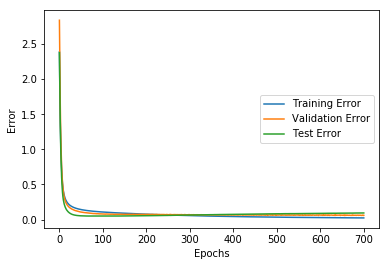

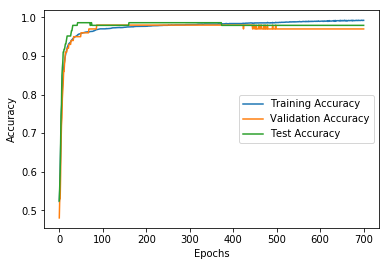

In [53]:
loss_curve(training_err,validation_err,test_err)
acc_curve(train_acc,validation_acc,test_acc)

    3.1.3. Batch Size Investigation 

In [54]:
def SDG(batch_size):
    init = tf.global_variables_initializer() 
    W, b, X, y_predicted, y_target, loss_error, optimizer, train, reg_param = buildGraph("CE")
    epochs = 700
    reg = 0
    num_batch = 3500/batch_size

    training_err = np.zeros(epochs)
    train_acc = np.zeros(epochs)

    validation_err = np.zeros(epochs)
    validation_acc = np.zeros(epochs)

    test_err = np.zeros(epochs)
    test_acc = np.zeros(epochs)

    with tf.Session() as sess:
        init = tf.global_variables_initializer() 
        sess.run(init)

        for epoch in range(0,epochs): 
            rand_index = np.random.choice(3500,3500,replace=False)
            trainDataShuffled =  trainData[rand_index]
            trainTargetShuffled = trainTarget[rand_index]

            for i in range(0,trainData.shape[0], batch_size):
                X_train_mini = trainDataShuffled[i:i+batch_size]  
                y_train_mini = trainTargetShuffled[i:i+batch_size]  
                sess.run(train, feed_dict={X: X_train_mini, y_target: y_train_mini, reg_param: reg}) 

            #Training Metrics
            train_err, yhat = sess.run([loss_error, y_predicted], feed_dict={X: trainDataShuffled, y_target: trainTargetShuffled, reg_param: reg}) 
            training_err[epoch] = train_err
            train_acc[epoch] = accuracy_score(trainTargetShuffled, predictions(yhat))

            #Validation Metrics
            val_err, yhat_v = sess.run([loss_error, y_predicted], feed_dict={X: validData, y_target: validTarget,reg_param: reg}) 
            validation_err[epoch] = val_err
            validation_acc[epoch] = accuracy_score(validTarget, predictions(yhat_v))

            #Test Metrics
            tst_err, yhat_t = sess.run([loss_error, y_predicted], feed_dict={X: testData, y_target: testTarget,reg_param: reg}) 
            test_err[epoch] = tst_err
            test_acc[epoch] = accuracy_score(testTarget, predictions(yhat_t))

            if epoch % 100 == 0:
                print("Iteration: %d, Error training: %.2f, Accuracy: %.2f" %(epoch, train_err,train_acc[epoch]))
            if epoch == epochs-1:
                print("Final Epoch: Error training: %.2f, Training Accuracy: %.2f" %(train_err,train_acc[epoch]))
                print("Final Epoch: Error validation: %.2f, Validation Accuracy: %.2f" %(val_err,validation_acc[epoch]))
                print("Final Epoch: Error test: %.2f, Test Accuracy: %.2f" %(tst_err,test_acc[epoch]))
                
    return training_err,validation_err,test_err,train_acc,validation_acc,test_acc


Iteration: 0, Error training: 1.82, Accuracy: 0.55
Iteration: 100, Error training: 0.05, Accuracy: 0.98
Iteration: 200, Error training: 0.03, Accuracy: 0.99
Iteration: 300, Error training: 0.02, Accuracy: 1.00
Iteration: 400, Error training: 0.01, Accuracy: 1.00
Iteration: 500, Error training: 0.01, Accuracy: 1.00
Iteration: 600, Error training: 0.01, Accuracy: 1.00
Final Epoch: Error training: 0.01, Training Accuracy: 1.00
Final Epoch: Error validation: 0.04, Validation Accuracy: 0.99
Final Epoch: Error test: 0.19, Test Accuracy: 0.98


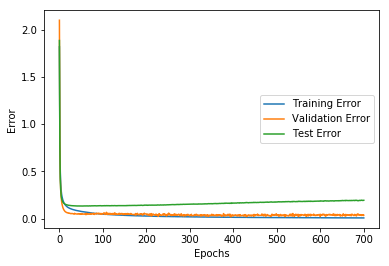

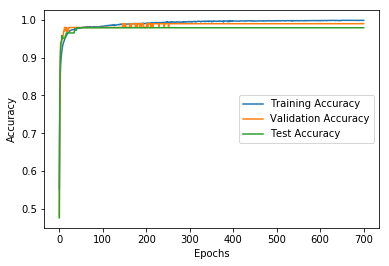

In [55]:
#Batch size 100
batch_size = 100
training_err,validation_err,test_err,train_acc,validation_acc,test_acc = SDG(batch_size)
loss_curve(training_err,validation_err,test_err)
acc_curve(train_acc,validation_acc,test_acc)

Iteration: 0, Error training: 4.39, Accuracy: 0.38
Iteration: 100, Error training: 0.12, Accuracy: 0.96
Iteration: 200, Error training: 0.09, Accuracy: 0.97
Iteration: 300, Error training: 0.08, Accuracy: 0.98
Iteration: 400, Error training: 0.06, Accuracy: 0.98
Iteration: 500, Error training: 0.05, Accuracy: 0.98
Iteration: 600, Error training: 0.04, Accuracy: 0.99
Final Epoch: Error training: 0.04, Training Accuracy: 0.99
Final Epoch: Error validation: 0.05, Validation Accuracy: 0.98
Final Epoch: Error test: 0.09, Test Accuracy: 0.98


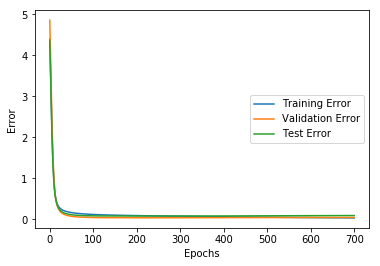

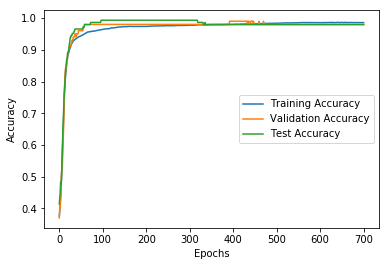

In [56]:
#Batch size 700
batch_size = 700
training_err,validation_err,test_err,train_acc,validation_acc,test_acc = SDG(batch_size)
loss_curve(training_err,validation_err,test_err)
acc_curve(train_acc,validation_acc,test_acc)

Iteration: 0, Error training: 0.87, Accuracy: 0.71
Iteration: 100, Error training: 0.15, Accuracy: 0.95
Iteration: 200, Error training: 0.11, Accuracy: 0.97
Iteration: 300, Error training: 0.08, Accuracy: 0.97
Iteration: 400, Error training: 0.07, Accuracy: 0.98
Iteration: 500, Error training: 0.06, Accuracy: 0.98
Iteration: 600, Error training: 0.05, Accuracy: 0.98
Final Epoch: Error training: 0.05, Training Accuracy: 0.98
Final Epoch: Error validation: 0.07, Validation Accuracy: 0.98
Final Epoch: Error test: 0.08, Test Accuracy: 0.97


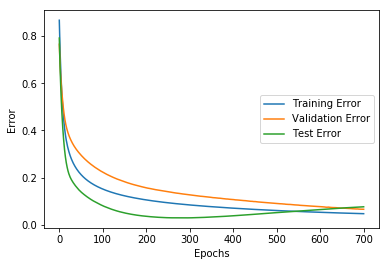

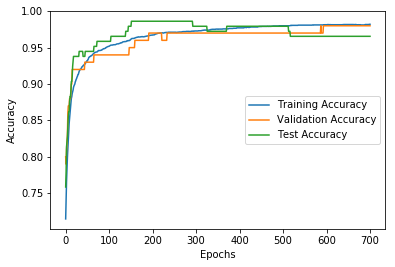

In [57]:
#Batch size 1750
batch_size = 1750
training_err,validation_err,test_err,train_acc,validation_acc,test_acc = SDG(batch_size)
loss_curve(training_err,validation_err,test_err)
acc_curve(train_acc,validation_acc,test_acc)

    3.1.4. Hyperparameter Investigation

In [58]:
def hyperparameter_graph(loss=None,b1=None,b2=None,eps=None):
    #Initialize weight and bias tensors
    tf.set_random_seed(421)
    
    W = tf.Variable(tf.truncated_normal(shape=[784,1], stddev=0.5), name='weights')
    b = tf.Variable(1.0, name='biases')
    
    X = tf.placeholder(tf.float32)
    y_target = tf.placeholder(tf.float32, name='y_target')
    reg_param = tf.placeholder(tf.float32)

    if loss == 'MSE':
        y_predicted = tf.matmul(X,W) + b
    elif loss == 'CE':
        z = tf.matmul(X,W) + b
        y_predicted = tf.sigmoid(z)
        
    sig = tf.sigmoid(y_predicted)
    log1 = tf.log(sig)
    log2 = tf.log(1-sig)
    
    if loss == "MSE":
        loss_error = tf.reduce_mean(tf.square(y_predicted - y_target),name='loss') + reg_param*tf.nn.l2_loss(W)
    elif loss == "CE":
        loss_error = tf.reduce_mean(-y_target*log1-(1-y_target)*log2) + reg_param*tf.nn.l2_loss(W)
        
    # Optimizer
    if b1 != None:
        optimizer = tf.train.AdamOptimizer(learning_rate = 0.001,beta1=b1)
    
    if b2 != None:
        optimizer = tf.train.AdamOptimizer(learning_rate = 0.001,beta2=b2)
        
    if eps != None:
        optimizer = tf.train.AdamOptimizer(learning_rate = 0.001,epsilon=eps)
    
    train = optimizer.minimize(loss=loss_error)
    
    return W, b, X, y_predicted, y_target, loss_error, optimizer, train, reg_param

In [59]:
def SDG_hyper(b1,b2,eps):
    init = tf.global_variables_initializer() 
    W, b, X, y_predicted, y_target, loss_error, optimizer, train, reg_param = hyperparameter_graph("CE",b1,b2,eps)
    batch_size = 500
    epochs = 700
    reg = 0
    num_batch = 3500/batch_size

    training_err = np.zeros(epochs)
    train_acc = np.zeros(epochs)

    validation_err = np.zeros(epochs)
    validation_acc = np.zeros(epochs)

    test_err = np.zeros(epochs)
    test_acc = np.zeros(epochs)

    with tf.Session() as sess:
        init = tf.global_variables_initializer() 
        sess.run(init)

        for epoch in range(0,epochs): 
            rand_index = np.random.choice(3500,3500,replace=False)
            trainDataShuffled =  trainData[rand_index]
            trainTargetShuffled = trainTarget[rand_index]

            for i in range(0,trainData.shape[0], batch_size):
                X_train_mini = trainDataShuffled[i:i+batch_size]  
                y_train_mini = trainTargetShuffled[i:i+batch_size]  
                sess.run(train, feed_dict={X: X_train_mini, y_target: y_train_mini, reg_param: reg}) 

            #Training Metrics
            train_err, yhat = sess.run([loss_error, y_predicted], feed_dict={X: trainDataShuffled, y_target: trainTargetShuffled, reg_param: reg}) 
            training_err[epoch] = train_err
            train_acc[epoch] = accuracy_score(trainTargetShuffled, predictions(yhat))

            #Validation Metrics
            val_err, yhat_v = sess.run([loss_error, y_predicted], feed_dict={X: validData, y_target: validTarget,reg_param: reg}) 
            validation_err[epoch] = val_err
            validation_acc[epoch] = accuracy_score(validTarget, predictions(yhat_v))

            #Test Metrics
            tst_err, yhat_t = sess.run([loss_error, y_predicted], feed_dict={X: testData, y_target: testTarget,reg_param: reg}) 
            test_err[epoch] = tst_err
            test_acc[epoch] = accuracy_score(testTarget, predictions(yhat_t))

            if epoch == epochs-1:
                print("Final Epoch: Error training: %.2f, Training Accuracy: %.2f" %(train_err,train_acc[epoch]))
                print("Final Epoch: Error validation: %.2f, Validation Accuracy: %.2f" %(val_err,validation_acc[epoch]))
                print("Final Epoch: Error test: %.2f, Test Accuracy: %.2f" %(tst_err,test_acc[epoch]))
                
    return training_err,validation_err,test_err,train_acc,validation_acc,test_acc

In [60]:
#Beta1 = 0.95
b1=0.95
b2=None
eps=None
training_err,validation_err,test_err,train_acc,validation_acc,test_acc = SDG_hyper(b1,b2,eps)

Final Epoch: Error training: 0.51, Training Accuracy: 0.99
Final Epoch: Error validation: 0.53, Validation Accuracy: 1.00
Final Epoch: Error test: 0.51, Test Accuracy: 0.97


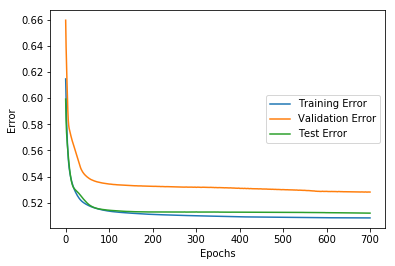

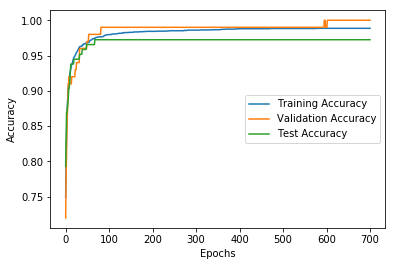

In [61]:
loss_curve(training_err,validation_err,test_err)
acc_curve(train_acc,validation_acc,test_acc)

In [62]:
#Beta1 = 0.99
b1=0.99
b2=None
eps=None
training_err,validation_err,test_err,train_acc,validation_acc,test_acc = SDG_hyper(b1,b2,eps)

Final Epoch: Error training: 0.51, Training Accuracy: 0.99
Final Epoch: Error validation: 0.53, Validation Accuracy: 1.00
Final Epoch: Error test: 0.51, Test Accuracy: 0.99


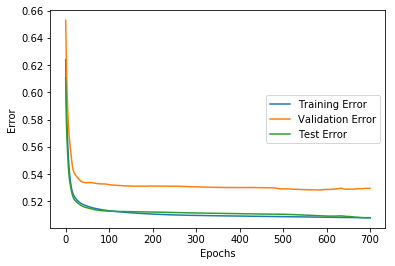

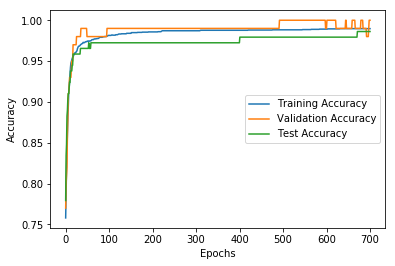

In [63]:
loss_curve(training_err,validation_err,test_err)
acc_curve(train_acc,validation_acc,test_acc)

In [64]:
#Beta2 = 0.99
b1=None
b2=0.99
eps=None
training_err,validation_err,test_err,train_acc,validation_acc,test_acc = SDG_hyper(b1,b2,eps)

Final Epoch: Error training: 0.51, Training Accuracy: 0.99
Final Epoch: Error validation: 0.53, Validation Accuracy: 0.99
Final Epoch: Error test: 0.51, Test Accuracy: 0.98


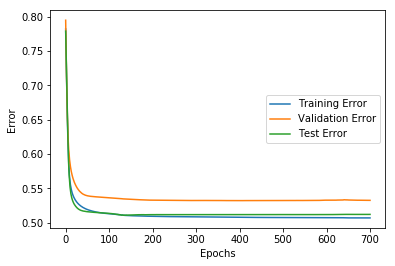

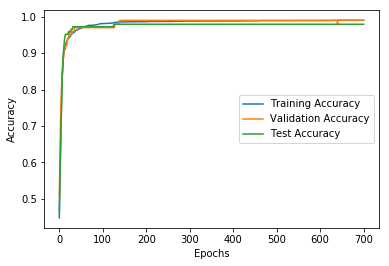

In [65]:
loss_curve(training_err,validation_err,test_err)
acc_curve(train_acc,validation_acc,test_acc)

In [66]:
#Beta2 = 0.9999
b1=None
b2=0.9999
eps=None
training_err,validation_err,test_err,train_acc,validation_acc,test_acc = SDG_hyper(b1,b2,eps)

Final Epoch: Error training: 0.51, Training Accuracy: 0.99
Final Epoch: Error validation: 0.53, Validation Accuracy: 0.98
Final Epoch: Error test: 0.51, Test Accuracy: 0.98


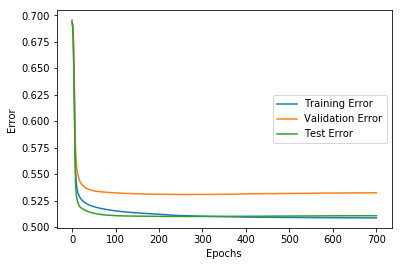

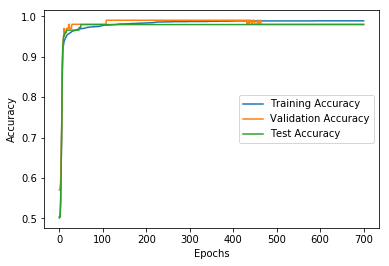

In [67]:
loss_curve(training_err,validation_err,test_err)
acc_curve(train_acc,validation_acc,test_acc)

In [68]:
#Epsilon = 1e−09
b1=None
b2=None
eps= 1e-9
training_err,validation_err,test_err,train_acc,validation_acc,test_acc = SDG_hyper(b1,b2,eps)

Final Epoch: Error training: 0.51, Training Accuracy: 0.99
Final Epoch: Error validation: 0.53, Validation Accuracy: 0.99
Final Epoch: Error test: 0.52, Test Accuracy: 0.96


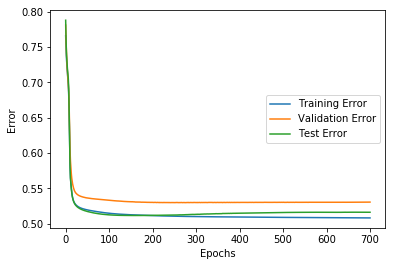

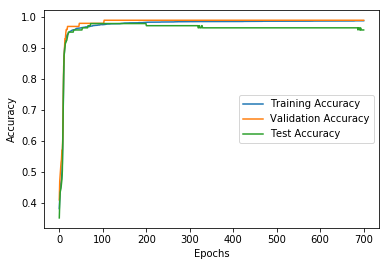

In [69]:
loss_curve(training_err,validation_err,test_err)
acc_curve(train_acc,validation_acc,test_acc)

In [70]:
#Epsilon = 1e−4
b1=None
b2=None
eps=1e-4
training_err,validation_err,test_err,train_acc,validation_acc,test_acc = SDG_hyper(b1,b2,eps)

Final Epoch: Error training: 0.51, Training Accuracy: 0.99
Final Epoch: Error validation: 0.53, Validation Accuracy: 0.99
Final Epoch: Error test: 0.51, Test Accuracy: 0.98


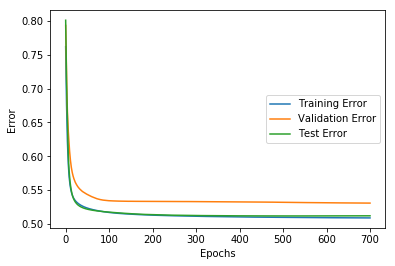

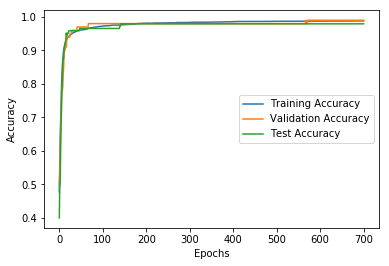

In [71]:
loss_curve(training_err,validation_err,test_err)
acc_curve(train_acc,validation_acc,test_acc)